In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
house = pd.read_csv("Bengaluru_House_Data.csv")

In [3]:
house.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [4]:
house.shape

(13320, 9)

# DATA CLEANING:-

In [5]:
house.drop(columns=["society" , "area_type" , "availability"],inplace=True)

In [6]:
print(house.head())

print(house.shape)

                   location       size total_sqft  bath  balcony   price
0  Electronic City Phase II      2 BHK       1056   2.0      1.0   39.07
1          Chikka Tirupathi  4 Bedroom       2600   5.0      3.0  120.00
2               Uttarahalli      3 BHK       1440   2.0      3.0   62.00
3        Lingadheeranahalli      3 BHK       1521   3.0      1.0   95.00
4                  Kothanur      2 BHK       1200   2.0      1.0   51.00
(13320, 6)


In [7]:
house.dtypes

location       object
size           object
total_sqft     object
bath          float64
balcony       float64
price         float64
dtype: object

In [8]:
house.describe()

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


#since here total_sqft is an object datatype we have to convert it into float like other numerical columns

In [9]:
house["total_sqft"].isnull().sum()

0

In [10]:
house["total_sqft"].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

#we have to remove those ranges values, e.g., 1133-1384

In [11]:
def Convertt(x):
    
    t = x.split("-")
    if len(t) == 2:
        
        return (float(t[0])+float(t[1]))/2
    
    try:
        return float(x)
    
    except:
        
        return None

In [12]:
house["total_sqft"] = house["total_sqft"].apply(Convertt)

In [13]:
house["total_sqft"].unique()

array([1056. , 2600. , 1440. , ..., 1258.5,  774. , 4689. ])

In [14]:
house.dtypes

location       object
size           object
total_sqft    float64
bath          float64
balcony       float64
price         float64
dtype: object

#total_sqft column is successfully converted into float

In [15]:
#lets check for size column

house["size"].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', nan, '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

#lets check for the missing values:-

In [16]:
house["size"].isnull().sum() #16 missing values are there

16

In [17]:
house["size"].value_counts() 

2 BHK         5199
3 BHK         4310
4 Bedroom      826
4 BHK          591
3 Bedroom      547
1 BHK          538
2 Bedroom      329
5 Bedroom      297
6 Bedroom      191
1 Bedroom      105
8 Bedroom       84
7 Bedroom       83
5 BHK           59
9 Bedroom       46
6 BHK           30
7 BHK           17
1 RK            13
10 Bedroom      12
9 BHK            8
8 BHK            5
11 BHK           2
11 Bedroom       2
10 BHK           2
14 BHK           1
13 BHK           1
12 Bedroom       1
27 BHK           1
43 Bedroom       1
16 BHK           1
19 BHK           1
18 Bedroom       1
Name: size, dtype: int64

#lets replace the missing values with "2 BHK" because it is mostly there in that column and our missing values size is also low
#dataset will not be affected

In [18]:
house["size"]=house["size"].fillna("2 BHK") 

In [19]:
house["size"].isnull().sum()

0

missing values are treated in size column

#lets make the float column for size to fix the issue ,e.g., 3 BHK and 3 Bedroom are same but feature is differ here.

In [20]:
house["BHK"] = house["size"].str.split().str.get(0) 

In [21]:
house.head()

,location,size,total_sqft,bath,balcony,price,BHK
0,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,2


In [22]:
house.dtypes

location       object
size           object
total_sqft    float64
bath          float64
balcony       float64
price         float64
BHK            object
dtype: object

#here BHK is a object data type we have to convert it into float

In [23]:
house["BHK"].unique()

array(['2', '4', '3', '6', '1', '8', '7', '5', '11', '9', '27', '10',
       '19', '16', '43', '14', '12', '13', '18'], dtype=object)

In [24]:
house["BHK"] = house["BHK"].astype(float)        #converting BHK column from object data type into float 

In [25]:
house.dtypes

location       object
size           object
total_sqft    float64
bath          float64
balcony       float64
price         float64
BHK           float64
dtype: object

#BHK is successfully converted into float data type 

In [26]:
#we dont need the size column as we have BHK column now

house.drop(columns=["size"],inplace=True)

In [27]:
house.head()

,location,total_sqft,bath,balcony,price,BHK
0,Electronic City Phase II,1056.0,2.0,1.0,39.07,2.0
1,Chikka Tirupathi,2600.0,5.0,3.0,120.00,4.0
2,Uttarahalli,1440.0,2.0,3.0,62.00,3.0
3,Lingadheeranahalli,1521.0,3.0,1.0,95.00,3.0
4,Kothanur,1200.0,2.0,1.0,51.00,2.0


#now checking for other columns' missing values in dataset

In [28]:
house.isnull().sum()

location        1
total_sqft     46
bath           73
balcony       609
price           0
BHK             0
dtype: int64

In [29]:
#we dont really need balcony column in the dataset since it is no use for our ml model
#dropping:-
house.drop(columns=["balcony"],inplace=True)


In [30]:
house.head()

,location,total_sqft,bath,price,BHK
0,Electronic City Phase II,1056.0,2.0,39.07,2.0
1,Chikka Tirupathi,2600.0,5.0,120.00,4.0
2,Uttarahalli,1440.0,2.0,62.00,3.0
3,Lingadheeranahalli,1521.0,3.0,95.00,3.0
4,Kothanur,1200.0,2.0,51.00,2.0


#for bath column:-

In [31]:
house["bath"].unique()

array([ 2.,  5.,  3.,  4.,  6.,  1.,  9., nan,  8.,  7., 11., 10., 14.,
       27., 12., 16., 40., 15., 13., 18.])

In [32]:
house["bath"].value_counts()

2.0     6908
3.0     3286
4.0     1226
1.0      788
5.0      524
6.0      273
7.0      102
8.0       64
9.0       43
10.0      13
12.0       7
13.0       3
11.0       3
16.0       2
27.0       1
40.0       1
15.0       1
14.0       1
18.0       1
Name: bath, dtype: int64

#there are many bathrooms which are more than 10 which is something not possible it can be called as outliers

C:\Users\Tanay's PC\AppData\Local\Temp\ipykernel_7212\198575066.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(house["bath"])


<AxesSubplot:xlabel='bath', ylabel='Density'>

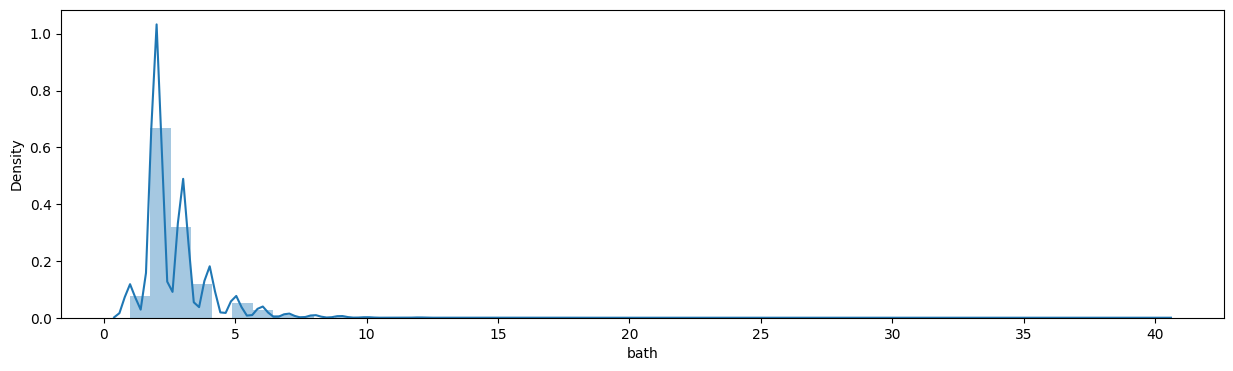

In [33]:
plt.figure(figsize=(15,4))

sns.distplot(house["bath"])

#graph is nearly skewed 

<AxesSubplot:>

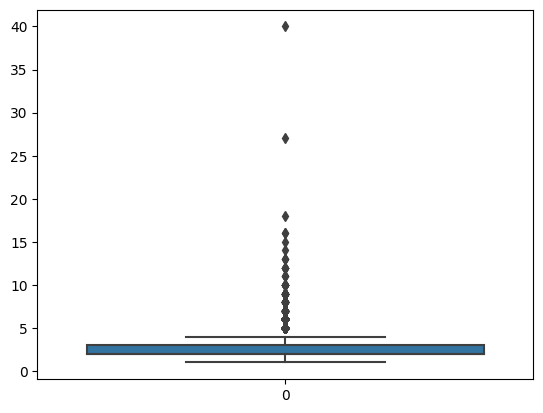

In [34]:
#boxplot

sns.boxplot(house["bath"])

In [35]:
house["bath"].describe()

count    13247.000000
mean         2.692610
std          1.341458
min          1.000000
25%          2.000000
50%          2.000000
75%          3.000000
max         40.000000
Name: bath, dtype: float64

In [36]:
#using percentile method for treating outlier in bath column
upper_limit = house["bath"].quantile(0.99)
lower_limit = house["bath"].quantile(0.01)

In [37]:
upper_limit

8.0

In [38]:
lower_limit

1.0

In [39]:
house['bath'] = np.where(house['bath'] >= upper_limit,
        upper_limit,
        np.where(house['bath'] <= lower_limit,
        lower_limit,
        house['bath']))

#treated outliers in bath column successfully

In [40]:
house["bath"].describe()

count    13247.000000
mean         2.676682
std          1.215998
min          1.000000
25%          2.000000
50%          2.000000
75%          3.000000
max          8.000000
Name: bath, dtype: float64

In [41]:
house.describe()

,total_sqft,bath,price,BHK
count,13274.000000,13247.000000,13320.000000,13320.000000
mean,1559.626694,2.676682,112.565627,2.802778
std,1238.405258,1.215998,148.971674,1.294496
min,1.000000,1.000000,8.000000,1.000000
25%,1100.000000,2.000000,50.000000,2.000000
50%,1276.000000,2.000000,72.000000,3.000000
75%,1680.000000,3.000000,120.000000,3.000000
max,52272.000000,8.000000,3600.000000,43.000000


<AxesSubplot:>

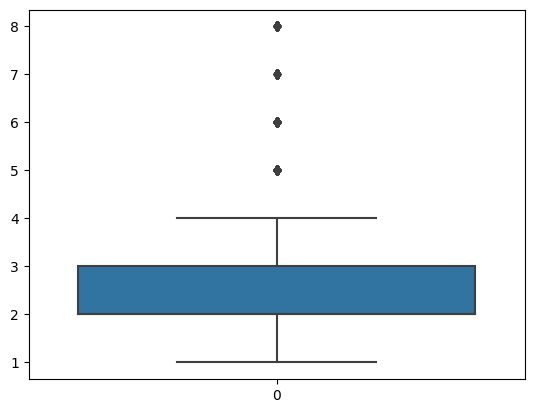

In [42]:
sns.boxplot(house["bath"])

In [43]:
#we can use mean or median method for the missing values

house["bath"] = house["bath"].fillna(house["bath"].mean())

In [44]:
house.isnull().sum()

location       1
total_sqft    46
bath           0
price          0
BHK            0
dtype: int64

#missing values are treated in bath column

for location column:-

In [45]:
house["location"].value_counts()

Whitefield                        540
Sarjapur  Road                    399
Electronic City                   302
Kanakpura Road                    273
Thanisandra                       234
                                 ... 
Bapuji Layout                       1
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
singapura paradise                  1
Abshot Layout                       1
Name: location, Length: 1305, dtype: int64

In [46]:
house["location"]=house["location"].fillna("Whitefield")          #replace one missing value with "Whitefield"

In [47]:
house.isnull().sum()

location       0
total_sqft    46
bath           0
price          0
BHK            0
dtype: int64

#now treating missing value in total_sqft:-

In [48]:
house["total_sqft"].value_counts()

1200.0    843
1100.0    221
1500.0    206
2400.0    196
600.0     180
         ... 
3080.0      1
787.0       1
6613.0      1
502.0       1
4689.0      1
Name: total_sqft, Length: 1999, dtype: int64

In [49]:
house["total_sqft"].describe()

count    13274.000000
mean      1559.626694
std       1238.405258
min          1.000000
25%       1100.000000
50%       1276.000000
75%       1680.000000
max      52272.000000
Name: total_sqft, dtype: float64

#there are few outliers in total_sqft column also 

C:\Users\Tanay's PC\AppData\Local\Temp\ipykernel_7212\348016894.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(house["total_sqft"])


<AxesSubplot:xlabel='total_sqft', ylabel='Density'>

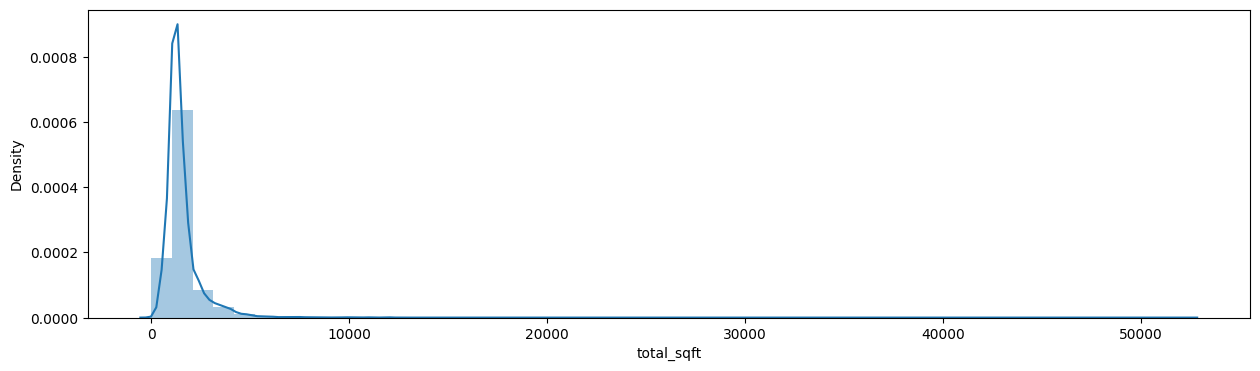

In [50]:
plt.figure(figsize=(15,4))

sns.distplot(house["total_sqft"])

<AxesSubplot:>

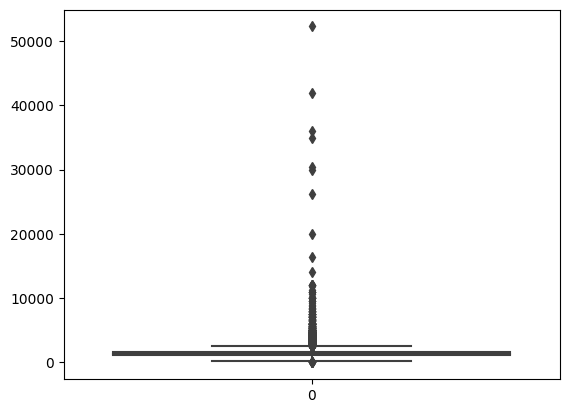

In [51]:
sns.boxplot(house["total_sqft"])

there are lots of outliers in total_sqft column

In [52]:
#using percentile method for treating outlier in bath column
upper_limit = house["total_sqft"].quantile(0.99)
lower_limit = house["total_sqft"].quantile(0.01)

In [53]:
upper_limit

5000.0

In [54]:
lower_limit

500.0

In [55]:
house['total_sqft'] = np.where(house['total_sqft'] >= upper_limit,
        upper_limit,
        np.where(house['total_sqft'] <= lower_limit,
        lower_limit,
        house['total_sqft']))

In [56]:
house["total_sqft"].describe()

count    13274.000000
mean      1522.507803
std        788.014864
min        500.000000
25%       1100.000000
50%       1276.000000
75%       1680.000000
max       5000.000000
Name: total_sqft, dtype: float64

#treated outliers successfully in total_sqft column

C:\Users\Tanay's PC\AppData\Local\Temp\ipykernel_7212\348016894.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(house["total_sqft"])


<AxesSubplot:xlabel='total_sqft', ylabel='Density'>

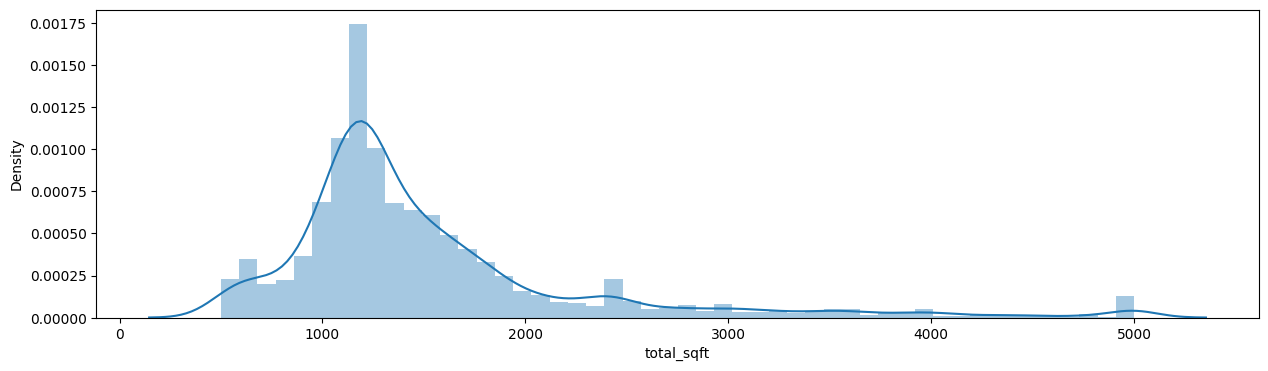

In [57]:
plt.figure(figsize=(15,4))

sns.distplot(house["total_sqft"])

In [58]:
house.isnull().sum()

location       0
total_sqft    46
bath           0
price          0
BHK            0
dtype: int64

#treating missing values:-



In [59]:
#we can use mean or median method for the missing values

house["total_sqft"] = house["total_sqft"].fillna(house["total_sqft"].mean())

In [60]:
house.isnull().sum()

location      0
total_sqft    0
bath          0
price         0
BHK           0
dtype: int64

#now no missing values in the whole dataset

In [61]:
house.describe()

,total_sqft,bath,price,BHK
count,13320.000000,13320.000000,13320.000000,13320.000000
mean,1522.507803,2.676682,112.565627,2.802778
std,786.652899,1.212661,148.971674,1.294496
min,500.000000,1.000000,8.000000,1.000000
25%,1100.000000,2.000000,50.000000,2.000000
50%,1279.500000,2.000000,72.000000,3.000000
75%,1678.000000,3.000000,120.000000,3.000000
max,5000.000000,8.000000,3600.000000,43.000000


#there are outliers in BHK and Price column also

C:\Users\Tanay's PC\AppData\Local\Temp\ipykernel_7212\3224686813.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(house["price"])
C:\Users\Tanay's PC\AppData\Local\Temp\ipykernel_7212\3224686813.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(house["BHK"])


<AxesSubplot:xlabel='BHK', ylabel='Density'>

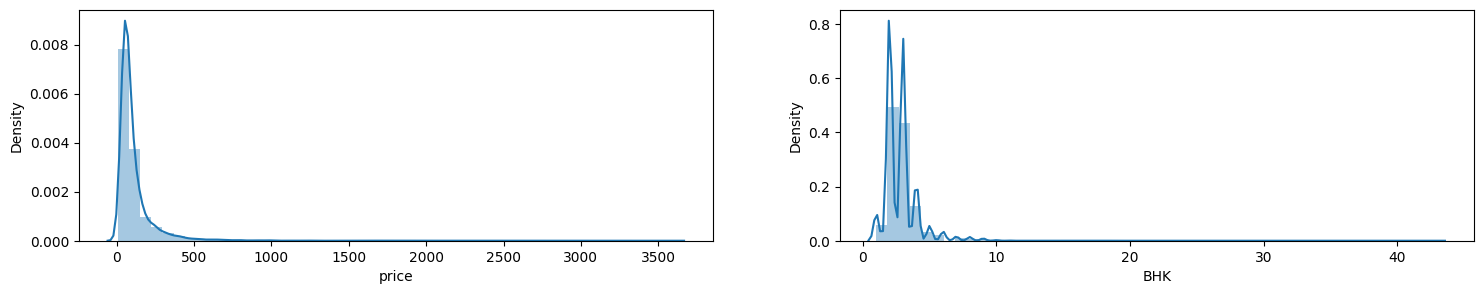

In [62]:
plt.figure(figsize=(18,3))


plt.subplot(1,2,1)
sns.distplot(house["price"])


plt.subplot(1,2,2)
sns.distplot(house["BHK"])

#both columns price and BHK are nearly skewed graph

FOR PRICE:-

In [63]:
#using percentile method for treating outlier in bath column
upper_limit = house["price"].quantile(0.99)
lower_limit = house["price"].quantile(0.01)

In [64]:
upper_limit

658.0999999999949

In [65]:
lower_limit

18.5

In [66]:
house['price'] = np.where(house['price'] >= upper_limit,
        upper_limit,
        np.where(house['price'] <= lower_limit,
        lower_limit,
        house['price']))

In [67]:
house["price"].describe()

count    13320.000000
mean       107.794327
std        105.598956
min         18.500000
25%         50.000000
50%         72.000000
75%        120.000000
max        658.100000
Name: price, dtype: float64

#outliers treated successfully in price column

FOR BHK:-

In [68]:
#using percentile method for treating outlier in bath column
upper_limit = house["BHK"].quantile(0.99)
lower_limit = house["BHK"].quantile(0.01)

In [69]:
upper_limit

8.0

In [70]:
lower_limit

1.0

In [71]:
house['BHK'] = np.where(house['BHK'] >= upper_limit,
        upper_limit,
        np.where(house['BHK'] <= lower_limit,
        lower_limit,
        house['BHK']))

In [72]:
house["BHK"].describe()

count    13320.000000
mean         2.788363
std          1.169808
min          1.000000
25%          2.000000
50%          3.000000
75%          3.000000
max          8.000000
Name: BHK, dtype: float64

In [73]:
house.describe()

,total_sqft,bath,price,BHK
count,13320.000000,13320.000000,13320.000000,13320.000000
mean,1522.507803,2.676682,107.794327,2.788363
std,786.652899,1.212661,105.598956,1.169808
min,500.000000,1.000000,18.500000,1.000000
25%,1100.000000,2.000000,50.000000,2.000000
50%,1279.500000,2.000000,72.000000,3.000000
75%,1678.000000,3.000000,120.000000,3.000000
max,5000.000000,8.000000,658.100000,8.000000


EVERY OUTLIER IS TREATED AT EACH COLUMN

In [74]:
house.head()

,location,total_sqft,bath,price,BHK
0,Electronic City Phase II,1056.0,2.0,39.07,2.0
1,Chikka Tirupathi,2600.0,5.0,120.00,4.0
2,Uttarahalli,1440.0,2.0,62.00,3.0
3,Lingadheeranahalli,1521.0,3.0,95.00,3.0
4,Kothanur,1200.0,2.0,51.00,2.0


#cleaned dataset

In [75]:
house.to_csv("cleaned_dataset.csv")

# Mini Visualization:-

array([[<AxesSubplot:title={'center':'total_sqft'}>,
        <AxesSubplot:title={'center':'bath'}>],
       [<AxesSubplot:title={'center':'price'}>,
        <AxesSubplot:title={'center':'BHK'}>]], dtype=object)

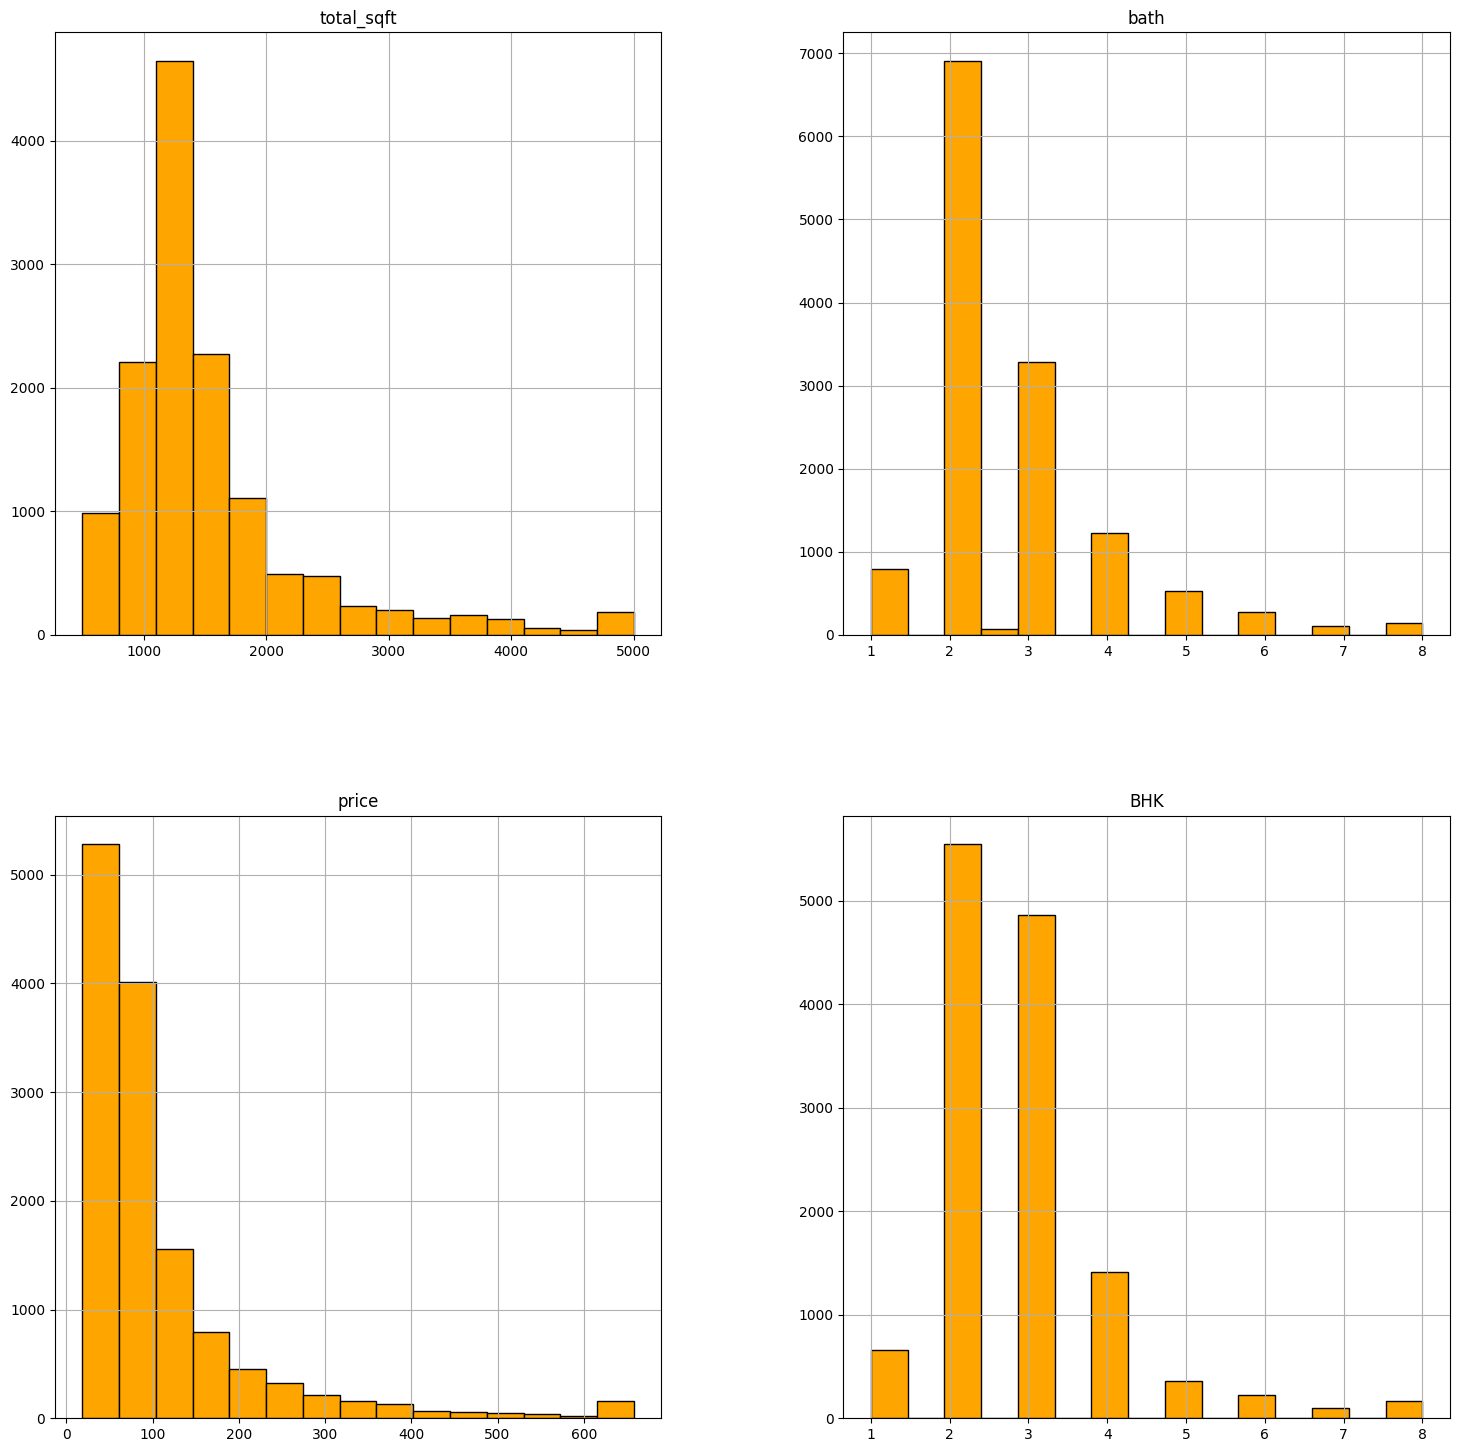

In [76]:
house.hist(figsize=(18,18)  , edgecolor="black" , color="orange" , bins=15)       #all the dataset features are now in the histogram 

# Marking target and Predictor variable:-

In [77]:
X = house.drop(columns=['price'])        #predictor variable

In [78]:
y = house['price']                #target variable

In [79]:
X.head()

,location,total_sqft,bath,BHK
0,Electronic City Phase II,1056.0,2.0,2.0
1,Chikka Tirupathi,2600.0,5.0,4.0
2,Uttarahalli,1440.0,2.0,3.0
3,Lingadheeranahalli,1521.0,3.0,3.0
4,Kothanur,1200.0,2.0,2.0


In [80]:
y.head()

0     39.07
1    120.00
2     62.00
3     95.00
4     51.00
Name: price, dtype: float64

# Splitting the dataset for training and testing:-

In [81]:
from sklearn.model_selection import train_test_split

In [82]:
X_train , X_test , y_train , y_test = train_test_split(X,y , test_size=0.2 , random_state=42)     #test size=20 percent , train size=70 percent

In [83]:
X_train.shape

(10656, 4)

In [84]:
X_test.shape

(2664, 4)

# Pipelining:-

In [85]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder , StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression , Lasso , Ridge
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import r2_score

from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor

In [86]:

column_trans = ColumnTransformer([
    ('ohe_location',OneHotEncoder(sparse=False,handle_unknown='ignore'),[0])
],remainder='passthrough')

In [87]:
scaler = StandardScaler()

# Linear Regression

In [88]:
lr = LinearRegression()

In [89]:
pipe = make_pipeline(column_trans , scaler , lr)

In [90]:
pipe.fit(X_train , y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe_location',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  [0])])),
                ('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

In [91]:
y_pred = pipe.predict(X_test)

In [92]:
r2_score(y_test , y_pred)

-1.7386707405944527e+20

# LASSO:-

In [93]:
LA = Lasso()

In [94]:
pipe = make_pipeline(column_trans , scaler , LA)

In [95]:
pipe.fit(X_train , y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe_location',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  [0])])),
                ('standardscaler', StandardScaler()), ('lasso', Lasso())])

In [96]:
y_pred_lasso = pipe.predict(X_test)

In [97]:
r2_score(y_test , y_pred_lasso)

0.6880084509844899

# Ridge:-

In [98]:
Ri = Ridge()

In [99]:
pipe = make_pipeline(column_trans , scaler , Ri)

In [100]:
pipe.fit(X_train , y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe_location',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  [0])])),
                ('standardscaler', StandardScaler()), ('ridge', Ridge())])

In [101]:
y_pred_ridge = pipe.predict(X_test)

In [102]:
r2_score(y_test , y_pred_ridge)

0.7003549984676627

# Random Forest Regressor:-

In [103]:
RF = RandomForestRegressor(n_estimators = 100, random_state = 0)

In [104]:
pipe = make_pipeline(column_trans , scaler , RF)

In [105]:
pipe.fit(X_train , y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe_location',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  [0])])),
                ('standardscaler', StandardScaler()),
                ('randomforestregressor',
                 RandomForestRegressor(random_state=0))])

In [106]:
y_pred_Random = pipe.predict(X_test)

In [107]:
r2_score(y_test , y_pred_Random)

0.7117025441314552

# Random Forest Regressor and Ridge are doing Good Prediction.